https://www.supplychaindataanalytics.com/continuous-linear-optimization-in-pulp-python/

In [1]:
# importing PuLP (can be installed with pip install, e.g. in the anaconda prompt)
import pulp

# use the LpProblem function to initialize a statement of our linear optimization problem
linearProblem = pulp.LpProblem(
    "some title", pulp.LpMaximize
)  # we maximize, and thus use LpMaximize as parameter

# using the PuLP module optimization variables have to be declared with the LpVariable function
x1 = pulp.LpVariable("x1", lowBound=0)  # x1 has only lower bound, no upper bound
x2 = pulp.LpVariable("x2", lowBound=0)  # x2 has only lower bound, no upper bound

# using the += operator we can add the objective function to the problem declared
linearProblem += 2 * x1 + 3 * x2

# same approach is valid for adding constraints
linearProblem += x1 + x2 <= 10
linearProblem += 2 * x1 + x2 <= 15

# we can review our problem now
linearProblem

c:\Users\hetia\AppData\Local\Programs\Python\Python39\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


some_title:
MAXIMIZE
2*x1 + 3*x2 + 0
SUBJECT TO
_C1: x1 + x2 <= 10

_C2: 2 x1 + x2 <= 15

VARIABLES
x1 Continuous
x2 Continuous

In [2]:
# solve the problem, using the standard PuLP solver for continuous linear optimization problems
solution = linearProblem.solve()

# see if optimization run was successful, using LpStatus from the PuLP module
pulp.LpStatus[solution]

'Optimal'

In [3]:
# the optimal objective function value is accessed with the value function in the following way
pulp.value(linearProblem.objective)

30.0

In [4]:
# the optimal solution for x1 is accessed with the value function as well (but we already have x1 as handler)
pulp.value(x1)

0.0

In [5]:
# lastly, below I show optimal solution for x2
pulp.value(x2)

10.0

https://www.supplychaindataanalytics.com/multi-objective-linear-optimization-with-pulp-in-python/

Approach 1: Maximizing for one objective, then adding it as a constraint and solving for the other objective

In [2]:
# first, import PuLP
import pulp

# then, conduct initial declaration of problem
linearProblem = pulp.LpProblem("Maximizing for first objective", pulp.LpMaximize)

# delcare optimization variables, using PuLP
x1 = pulp.LpVariable("x1", lowBound=0)
x2 = pulp.LpVariable("x2", lowBound=0)

# add (first) objective function to the linear problem statement
linearProblem += 2 * x1 + 3 * x2

# add the constraints to the problem
linearProblem += x1 + x2 <= 10
linearProblem += 2 * x1 + x2 <= 15

# solve with default solver, maximizing the first objective
solution = linearProblem.solve()

# output information if optimum was found, what the maximal objective value is and what the optimal point is
print(
    str(pulp.LpStatus[solution])
    + " ; max value = "
    + str(pulp.value(linearProblem.objective))
    + " ; x1_opt = "
    + str(pulp.value(x1))
    + " ; x2_opt = "
    + str(pulp.value(x2))
)

Optimal ; max value = 30.0 ; x1_opt = 0.0 ; x2_opt = 10.0


c:\Users\hetia\AppData\Local\Programs\Python\Python39\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [4]:
# remodel the problem statement
linearProblem = pulp.LpProblem("Maximize second objective", pulp.LpMaximize)
linearProblem += 4 * x1 - 2 * x2
linearProblem += x1 + x2 <= 10
linearProblem += 2 * x1 + x2 <= 15
linearProblem += 2 * x1 + 3 * x2 >= 30

# review problem statement after remodelling
linearProblem

Maximize_second_objective:
MAXIMIZE
4*x1 + -2*x2 + 0
SUBJECT TO
_C1: x1 + x2 <= 10

_C2: 2 x1 + x2 <= 15

_C3: 2 x1 + 3 x2 >= 30

VARIABLES
x1 Continuous
x2 Continuous

In [5]:
# apply default solver
solution = linearProblem.solve()

# output a string summarizing whether optimum was found, and if so what the optimal solution
print(
    str(pulp.LpStatus[solution])
    + " ; max value = "
    + str(pulp.value(linearProblem.objective))
    + " ; x1_opt = "
    + str(pulp.value(x1))
    + " ; x2_opt = "
    + str(pulp.value(x2))
)

Optimal ; max value = -19.999999999995993 ; x1_opt = 1.0018653e-12 ; x2_opt = 10.0


Approach 2: Combine objectives, using sampled weights and iterations with defined step-size

A typical approach in a situation like this is to identify an efficient frontier. In economics this is e.g. known as “pareto optimality”. To construct such an approach I sample alpha in steps of 0.01. For each value of alpha I restate the problem, using PuLP – and solve it.

c:\Users\hetia\AppData\Local\Programs\Python\Python39\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


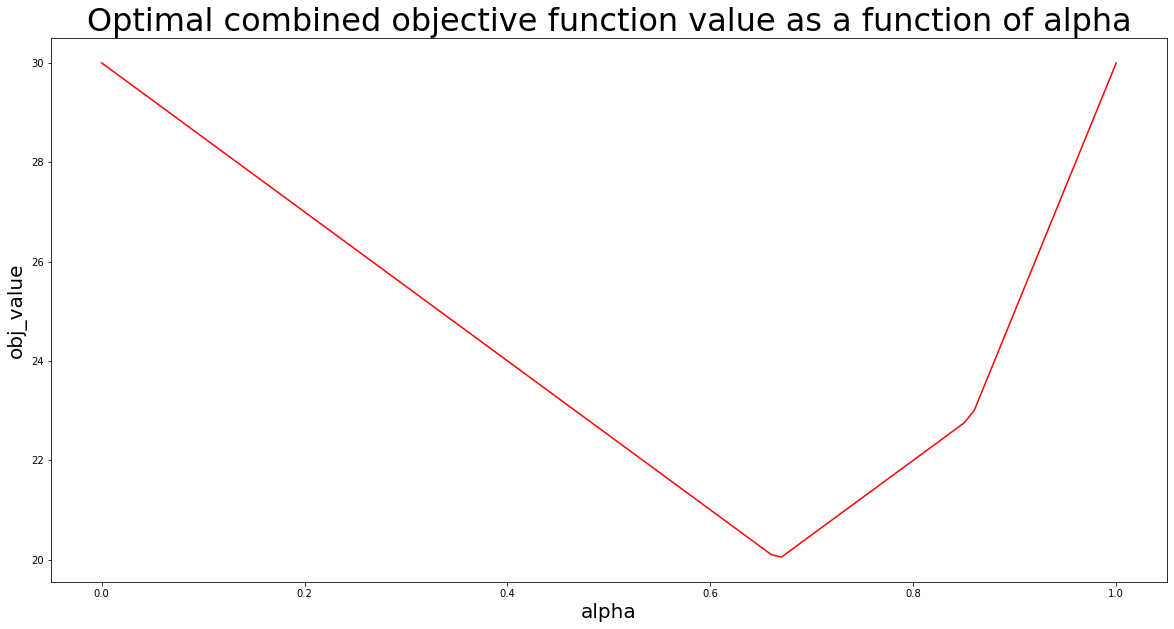

In [7]:
# import matplotlib.pyplot
import matplotlib.pyplot as plt

# import pandas and numpy for being able to store data in DataFrame format
import numpy as np
import pandas as pd

# define step-size
stepSize = 0.01

# initialize empty DataFrame for storing optimization outcomes
solutionTable = pd.DataFrame(columns=["alpha", "x1_opt", "x2_opt", "obj_value"])

# iterate through alpha values from 0 to 1 with stepSize, and write PuLP solutions into solutionTable
for i in range(0, 101, int(stepSize * 100)):
    # declare the problem again
    linearProblem = pulp.LpProblem(
        "Multi-objective linear maximization", pulp.LpMaximize
    )
    # add the objective function at sampled alpha
    linearProblem += (i / 100) * (2 * x1 + 3 * x2) + (1 - i / 100) * (4 * x1 - 2 * x2)
    # add the constraints
    linearProblem += x1 + x2 <= 10
    linearProblem += 2 * x1 + x2 <= 15
    # solve the problem
    solution = linearProblem.solve()
    # write solutions into DataFrame
    solutionTable.loc[int(i / (stepSize * 100))] = [
        i / 100,
        pulp.value(x1),
        pulp.value(x2),
        pulp.value(linearProblem.objective),
    ]

# visualize optimization outcome, using matplotlib.pyplot
# -- set figure size
plt.figure(figsize=(20, 10))
# -- create line plot
plt.plot(solutionTable["alpha"], solutionTable["obj_value"], color="red")
# -- add axis labels
plt.xlabel("alpha", size=20)
plt.ylabel("obj_value", size=20)
# -- add plot title
plt.title("Optimal combined objective function value as a function of alpha", size=32)
# -- show plot
plt.show()

In [8]:
solutionTable.head()

,alpha,x1_opt,x2_opt,obj_value
0,0.00,7.5,0.0,30.00
1,0.01,7.5,0.0,29.85
2,0.02,7.5,0.0,29.70
3,0.03,7.5,0.0,29.55
4,0.04,7.5,0.0,29.40


https://www.supplychaindataanalytics.com/multi-objective-linear-optimization-with-weighted-sub-problems-using-pulp-in-python/

Multi-objective LP with sub-problem weights

c:\Users\hetia\AppData\Local\Programs\Python\Python39\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


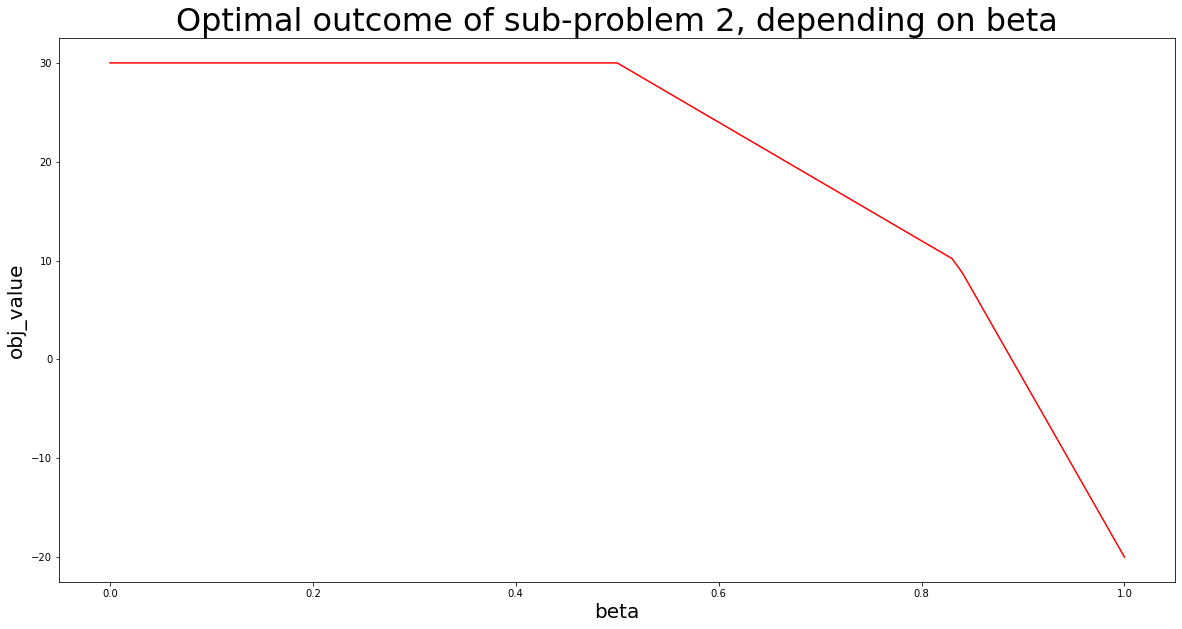

In [9]:
# import PuLP for modelling and solving problems
import pulp

# import matplotlib.pyplot for visualization
import matplotlib.pyplot as plt

# import pandas and numpy for being able to store solutions in DataFrame
import numpy as np
import pandas as pd

# define step-size
stepSize = 0.01

# initialize empty DataFrame for storing optimization outcomes
solutionTable = pd.DataFrame(columns=["beta", "x1_opt", "x2_opt", "obj_value"])

# declare optimization variables using PuLP and LpVariable
x1 = pulp.LpVariable("x1", lowBound=0)
x2 = pulp.LpVariable("x2", lowBound=0)

# model and solve sub-problem no. 1
linearProblem = pulp.LpProblem("First sub-problem", pulp.LpMaximize)
linearProblem += 2 * x1 + 3 * x2  # add objective no. 1
linearProblem += x1 + x2 <= 10  # add contraints from original problem statement
linearProblem += 2 * x1 + x2 <= 15
solution = linearProblem.solve()

# store optimal outcome of sub-problem no. 1 into variable
optimalObj1 = pulp.value(linearProblem.objective)

# iterate through beta values from 0 to 1 with stepSize, and write PuLP solutions into solutionTable
for i in range(0, 101, int(stepSize * 100)):
    # declare the problem again
    linearProblem = pulp.LpProblem(
        "Multi-objective linear maximization", pulp.LpMaximize
    )
    # add the second objective as objective function to this sub-problem
    linearProblem += 4 * x1 - 2 * x2
    # add the constraints from original problem statement
    linearProblem += x1 + x2 <= 10
    linearProblem += 2 * x1 + x2 <= 15
    # add additional constraint at level beta, considering optimal outcome of sub-problem no. 1
    linearProblem += 2 * x1 + 3 * x2 >= (i / 100) * optimalObj1
    # solve the problem
    solution = linearProblem.solve()
    # write solutions into DataFrame
    solutionTable.loc[int(i / (stepSize * 100))] = [
        i / 100,
        pulp.value(x1),
        pulp.value(x2),
        pulp.value(linearProblem.objective),
    ]

# visualize optimization outcome, using matplotlib.pyplot
# -- set figure size
plt.figure(figsize=(20, 10))
# -- create line plot
plt.plot(solutionTable["beta"], solutionTable["obj_value"], color="red")
# -- add axis labels
plt.xlabel("beta", size=20)
plt.ylabel("obj_value", size=20)
# -- add plot title
plt.title("Optimal outcome of sub-problem 2, depending on beta", size=32)
# -- show plot
plt.show()